The topics for today are:
* Under/over-determination
* Regularization
* Cross-validation

# Over- and under-determination

Over- and under-determination refer to the situation that a system of equations has zero or infinitely many solutions, respectively. For linear systems of equations, this essentially depends on the number of rows (data points) vs. the number of columns (model terms). If the number of columns is greater than the number of rows, then the system is over-determined and it generally has zero solutions, while in the opposite case it has infinitely many solutions.

Under-determination is mainly a problem in neural networks and other machine learning approaches, where the model itself is very large (i.e. it has many free parameters), but there is comparatively little data. In these cases, there is a major risk of *overfitting*, meaning that it is possible to find a set of parameter values that exactly reproduces the training data, but fails when applied to data that it was not trained on. Being able to detect and avoid overfitting is a main reason behind separating your data into *training* and *testing* sets, and this principle extends to *cross-validation* in general

In these cases, we would like to have a way to select a unique solution out of the infinite space of either non-solutions (in the overdetermined case) or solutions (in the underdetermined case). A general way to do this is through *regularization*

# Regularization

Regularization refers to modifying an optimization problem in such a way that its solution has better properties. Regularization can:
* Avoid overfitting
    * reduced sensitivity to measurement noise
    * better extrapolation error
* Promote sparsity, and therefore interpretability

Regularization is typically done by adding a term to the objective function. If, for example, our un-regularized optimization problem is linear least-squares:
$$
\hat{\beta} = \argmin_{\beta} \Vert A\beta - y \Vert
$$
then the regularized problem has the form
$$
\hat{\beta} = \argmin_{\beta} \Vert A\beta - y \Vert + \lambda w(\beta)
$$
where $w(\beta)$ is the *regularizer* and $\lambda$ is a parameter that determines how strongly to weight the regularizer.

Another approach to regularization is possible for under-determined problems. For an underdetermined problem, there are infinitely many solutions with exactly zero objective function value, so we can *impose a constraint* that we only want to consider solutions with zero (or in practice, very small) objective function value, and among those, pick the one with the smallest value of $w(\beta)$. In formal notation, this reads:
$$
\hat{\beta} =\argmin_{\beta} w(\beta) \textrm{  subject to  } \Vert A\beta - y \Vert \le \epsilon
$$

Some common choices of regularizer are:
* $w(\beta) = \Vert \beta \Vert_0 = $ the number of nonzero entries of $\beta$
* $w(\beta) = \Vert \beta \Vert_1 = \sum |\beta_i|$
* $w(\beta) = \Vert \beta \Vert_2 = (\sum \beta_i^2)^{1/2}$
* $w(\beta) = \Vert \beta \Vert_\infty = \max |\beta_i|$

The first in the list, the 0-norm, promotes *sparsity*; that is, a solution is considered better if it has fewer nonzero entries. This is very nice from an interpretation point of view, but the 0-norm is inconvenient from a computational standpoint. In particular, it is not convex, which means that upon including it in the optimization problem we are no longer guaranteed a unique solution, and its derivative is not informative (think about this) which makes gradient-based methods unable to deal with it. To truly solve an optimization problem that includes the 0-norm requires a combinatorial search over all possible subsets of the $\beta$ vector, which can take a lot of computation time.

In practice, the most common method of promoting sparsity is to use the 1-norm $\Vert\cdot\Vert_1$. The 1-norm is convex, and it is the closest convex function to the 0-norm. For some exploration of how 1-norm regularization helps find sparse solutions to (under-determined) least-squares problems, see [this](https://sparse-plex.readthedocs.io/en/latest/book/sparse_signal_models/underdetermined.html) nice post.

The 1-norm regularized least squares problem is so common that it has its on name: LASSO (Least Absolute Shrinkage and Selection Operator). Below you will code your own LASSO and test it out on some simulated data.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def LASSO(A, y, lam):
    """
    function that implements LASSO regression, i.e. solves the optimization problem
    
        min ||A beta - y||_2 + lam * ||beta||_1

    HINT: use the scipy function 'minimize' as a black-box optimization solver
    This function should definine an objective function based on the inputs, pass that objective function to 'minimize', and return the result
    
    INPUT:
        A : (n, m) matrix of model terms evaluated on data points
        y : (n,) vector of observations from the data
        lam : scalar, the weight of the 1-norm regularization

    OUTPUT:
        beta_hat : (m,) vector giving the optimal model weights
    """
    def my_loss(x):
        ...
    minimize(my_loss)
    return

In [ ]:
# test out your LASSO routine!
# the code below generates data from a parabola y=x^2, with noise
# use the polynomial_feature_matrix function you wrote last time to 

noise_level = 1e-2
n=100
m = 20

xdata = np.linspace(0, 2, n)
ytrue = xdata**2
ydata = ytrue + noise_level*np.random.randn(n)

def polynomial_feature_matrix(X, m = 1):
    """
    computes the matrix A(X) for use in polynomial regression

    INPUT:
        X = numpy array of length n giving measurements of the independent variable
        m = highest power to raise X to

    OUTPUT:
        A = matrix of monomial features of X up to order m
    """
    # CODE YOU WROTE LAST WEEK HERE
    return np.empty_like(X)

A = polynomial_feature_matrix(xdata, m)


# perform the regression for several values of lambda and see how the solution changes
# note: you know what the true function is
lams = [0, 0.1, 0.5, 1]
for j, lam in enumerate(lams):
    beta = LASSO(A, ydata, lam)
    plt.subplot(2, 2, j+1)
    plt.title(f'$\lambda =$ {lam}')
    plt.bar(range(len(beta)), beta)
plt.tight_layout()

The code above should show that there's a noticeable change in the quality of the solution obtained by using LASSO with different values of the regularization weight $\lambda$. To get a more detailed understanding of the difference, we can perform many trials of a similar experiment. This is done in the notebook named: `CH04_SEC04_1_CompareRegression.ipynb`, written by Daniel Dylewsky, which can be found either at [this link](https://github.com/dylewsky/Data_Driven_Science_Python_Demos/tree/master/CH04) or [this link](https://gitlab.com/jasnyder/scientific-computing-and-data-science-f2023/-/blob/main/CH04_SEC04_1_CompareRegression.ipynb)

This naturally raises the question: how to choose the *right* value of $\lambda$? This is a very important question and one without a very simple answer. What do you think should inform the choice of $\lambda$? Does it depend on the data set? On the objective function? On the noise level? On other properties of the problem? And how?


## Extrapolation performance with and without regularization

To demonstrate the utility of regularization, the next exercise will be to compare the extrapolation performance of a model obtained by ordinary least squares vs. one obtained by LASSO. To do this, we will take the data we used above and split it into two pieces, one where $x$ ranges from 0 to 1 and the other where $x$ ranges from 1 to 2. We will infer models on the first half of the data and asses their performance on the second half

In [ ]:
# split the data into training and test sets (first and second half, respectively)
# consider changing m
xtrain = xdata[:n//2]
ytrain = ydata[:n//2]
Atrain = polynomial_feature_matrix(xtrain, m)

xtest = xdata[n//2:]
ytest = ydata[n//2:]
Atest = polynomial_feature_matrix(xtest, m)

extrapolation_errors = list()

lams = np.linspace(0, 1)
for lam in lams:
    # get coefficients from the training data
    beta = LASSO(Atrain, ytrain, lam)
    # apply the coefficients to the testing data and evaluate
    ypred = Atest @ beta
    ext_error = np.linalg.norm(ypred - ytest)
    extrapolation_errors.append(ext_error)

plt.plot(lam, extrapolation_errors)

# Cross validation

Cross validation is an essential procedure in building models from data, since it is the only way to have confidence that your model will perform well on data it wasn't trained on. This is essential for any situation where we want to apply the model in the future, such as for prediction or classification of not-yet-observed data.

The essentially principle of cross-validation is to divide your data up into several different training sets, train a model on each of those data subsets, and take an average of the results. There are many ways to divide up your data into subsets, and consequently many ways to perform cross-validation

## k-fold cross validation
The k-fold cross validation procedure is as follows:
1. Start with data $\{x_i, y_i| i=1\dots N\}$ and features $\{f_k | k=1\dots M\}$
2. Divide the data points into *training* and *testing* subsets
3. Divide the traning subset further into $k$ subsets
4. For each of the $k$ subsets, compute $\hat{\beta}_j$ via your favorite regression algorithm (e.g. LASSO) applied to that subset of the data
5. Take their average, $\hat{\beta} = {1\over k}\sum_{j=1}^k \hat{\beta}_j$
6. Evaluate the performance of the model with parameters $\hat{\beta}$ on the testing subset of the data

In [ ]:
def k_fold_CV_lasso(Atrain, ytrain, lam=0, k=2):
    """
    This function performs k-fold cross-validation of LASSO modeling on the data Atrain, ytrain

    INPUT:
        Atrain : (Ntrain, M) matrix of M model terms evaluated on Ntrain training data points
        ytrain : (Ntrain,) vector of observations in the traning data
        lam : scalar, weight for the 1-norm in LASSO. Default = 0 gives ordinary least squares
        k : integer, number of folds to divide the training data into

    OUTPUT:
        beta : (M,) vector of cross-validated model weights
    """
    return

In [ ]:
# test out your cross-validation code!
# this will produce a figure similar to Figure 4.18 in the textbook.
n = 1100
noise_level = 5e-2
xdata = np.linspace(0, 4, n)
ytrue = xdata**2
ydata = ytrue + noise_level*np.random.randn(n)

A = polynomial_feature_matrix(xdata, m)

# define the testing subset
ntest = 100
test_subset = np.random.choice(n, size=ntest, replace=False) # replace = False argument ensures indices are not repeated
train_subset = np.array([j for j in range(n) if j not in test_subset]) # get all the indices that were not selected as training

# select the training subset out of the data
Atrain = A[train_subset,:]
ytrain = ydata[train_subset]

# make a figure to display the inferred coefficients for comparison
for i, k in enumerate([2, 20, 100]):
    for j, lam in enumerate([0, 0.5]):
        plt.subplot(2, 3, i+3*j+1)
        plt.title(f'k={k}, $\lambda$={lam}')
        beta = k_fold_CV_lasso(Atrain, ytrain, lam, k)
        plt.bar(np.arange(len(beta)), beta)
plt.tight_layout()


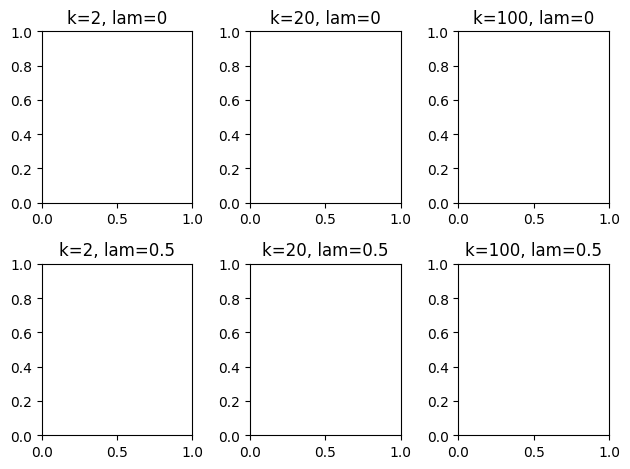

In [28]:

for i, k in enumerate([2, 20, 100]):
    for j, lam in enumerate([0, 0.5]):
        plt.subplot(2, 3, i+3*j+1)
        plt.title(f'k={k}, lam={lam}')
plt.tight_layout()
